<a href="https://www.kaggle.com/code/honwang/catching-pok-mon-outliers-unsupervised-adv?scriptVersionId=235509230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What is inside this notebook?
Have you ever wondered which Pokémon are true standouts—not just because they're legendary, but because their stats are just *off the charts* compared to the rest? In this notebook, we dive deep into the Pokémon world using unsupervised machine learning to discover outliers purely based on their numbers.

## Let's exercise with Machine Learning!
By combining **PCA** for dimensionality reduction and **DBSCAN** for outlier detection (with an automatically tuned magic touch ✨), we uncover Pokémon that truly break the mold. From towering dragons to ultra-light speedsters, we let the stats do the talking — no bias, no prior labels!

Join us on this adventure to "catch" anomalies and appreciate Pokémon in a whole new light! 🚀🎮

### If you find this fun and insightful, an upvote would mean the world — let's spread the love for data science and Pokémon!


## Objective
Embark on a journey to find the most unusual Pokémon using unsupervised machine learning! We'll explore the Pokémon universe, uncover statistical outliers, and discover what makes certain Pokémon truly stand out.

## Approach
1. Load and explore the dataset.
2. Preprocess the data by selecting relevant numerical features and handling missing values.
3. Scale the features to standardize the data.
4. Reduce dimensionality using PCA for easier visualization.
5. Apply DBSCAN clustering to detect outliers.
6. Visualize clusters and outliers.
7. Analyze and celebrate the unique Pokémon we catch!

## Tools and Libraries
- Python 3
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn


# Step 1: Load and Explore Dataset

## Explanation

We will load the Pokémon dataset into a pandas DataFrame, inspect its shape, and look at the first few rows to understand the data structure.


In [1]:
# Install required packages (if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Settings
sns.set(style="whitegrid")

# Load Data
df = pd.read_csv('/kaggle/input/pokemon-dataset-of-gen-1-gen-9/pokemon_data.csv')

# Show basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset shape: (1025, 48)
Columns: ['ID', 'Name', 'HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Base_Stats', 'normal_weakness', 'fire_weakness', 'water_weakness', 'electric_weakness', 'grass_weakness', 'ice_weakness', 'fighting_weakness', 'poison_weakness', 'ground_weakness', 'flying_weakness', 'psychic_weakness', 'bug_weakness', 'rock_weakness', 'ghost_weakness', 'dragon_weakness', 'dark_weakness', 'steel_weakness', 'fairy_weakness', 'height_inches', 'height_meters', 'weight_pounds', 'weight_kilograms', 'capturing_rate', 'gender_male_ratio', 'egg_steps', 'egg_cycles', 'abilities', 'Type 1', 'Type 2', 'Classification_info', 'Forms', 'gen', 'Is_Legendary', 'Is_Mythical', 'Is_Ultra_Beast', 'number_immune', 'number_not_effective', 'number_normal', 'number_super_effective']


,ID,Name,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Base_Stats,normal_weakness,...,Classification_info,Forms,gen,Is_Legendary,Is_Mythical,Is_Ultra_Beast,number_immune,number_not_effective,number_normal,number_super_effective
0,1,Bulbasaur,45,49,49,65,65,45,318,1.0,...,Seed,NaN,1,0,0,0,0,5,9,4
1,2,Ivysaur,60,62,63,80,80,60,405,1.0,...,Seed,NaN,1,0,0,0,0,5,9,4
2,3,Venusaur,80,82,83,100,100,80,525,1.0,...,Seed,Mega Venusaur,1,0,0,0,0,5,9,4
3,4,Charmander,39,52,43,60,50,65,309,1.0,...,Lizard,NaN,1,0,0,0,0,6,9,3
4,5,Charmeleon,58,64,58,80,65,80,405,1.0,...,Flame,NaN,1,0,0,0,0,6,9,3


# Step 2: Data Preprocessing

## Explanation
- Drop irrelevant columns such as Name, ID, and non-numerical features.
- Select numerical features only.
- Handle missing values by dropping rows.
- Standardize the data to ensure features are on the same scale.

In [2]:
# Step 2: Data Preprocessing

columns_to_drop = [
    'ID', 'Classification_info', 'Forms', 'abilities', 'Weaknesses', 
    'Type 1', 'Type 2', 'Is_Legendary', 'Is_Mythical', 'Is_Ultra_Beast',
    'gender_male_ratio', 'egg_steps', 'egg_cycles', 'capturing_rate'
]

pokemon_numeric = df.drop(columns=columns_to_drop, errors='ignore')

# Keep Name for later reference
pokemon_names = pokemon_numeric['Name']

# Drop Name column for features
pokemon_numeric = pokemon_numeric.drop(columns=['Name'], errors='ignore')

# Drop rows with missing values
pokemon_numeric.dropna(inplace=True)

# Select features for clustering
features = [
    'HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed',
    'Base_Stats', 'height_meters', 'weight_kilograms'
]

X = pokemon_numeric[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after preprocessing:", X_scaled.shape)

Shape after preprocessing: (1025, 9)


# Step 3: Dimensionality Reduction (PCA)

## Explanation
- We reduce the dimensionality of our standardized dataset using Principal Component Analysis (PCA).
- This helps in visualizing the data in 2D while preserving as much variance as possible.
- PCA also makes clustering more efficient by eliminating noise and redundancy.


In [3]:
# Step 3: Dimensionality Reduction (PCA)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by PCA components:", pca.explained_variance_ratio_)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Name'] = pokemon_names.values
pca_df.head()

Explained variance by PCA components: [0.46531317 0.14537443]


,PCA1,PCA2,Name
0,-1.922034,-0.061153,Bulbasaur
1,-0.520376,-0.454358,Ivysaur
2,1.721035,-0.539746,Venusaur
3,-2.163851,-0.411592,Charmander
4,-0.570406,-0.808407,Charmeleon


# Step 4: Clustering and Outlier Detection (DBSCAN)

## Explanation
- We'll apply DBSCAN to group Pokémon into clusters and detect outliers.
- DBSCAN is ideal because:
    - No need to pre-specify the number of clusters.
    - It identifies outliers naturally (label -1).
- Parameters to tune:
    - eps (epsilon): Max distance between points to be considered neighbors.
    - min_samples: Minimum number of points to form a dense region.

We'll start with eps=0.8 and min_samples=5 (good default).

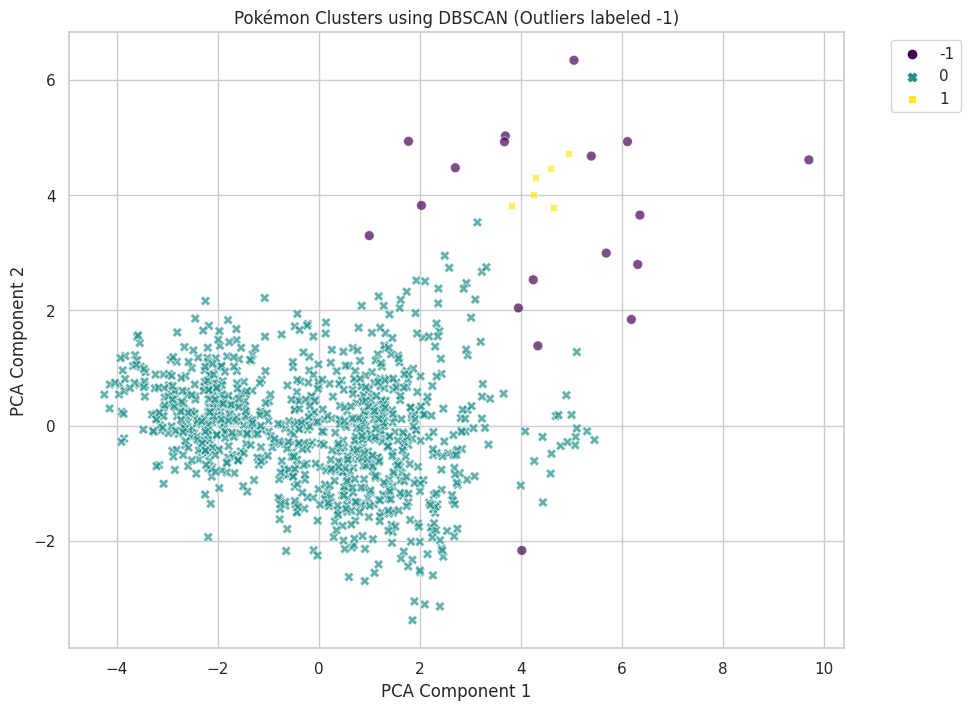

Number of Pokémon detected as outliers: 18


In [4]:
# Step 4: Clustering and Outlier Detection (DBSCAN)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_pca)

# Add cluster labels to the original data
pca_df['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    style='Cluster',
    s=50,
    alpha=0.7
)
plt.title('Pokémon Clusters using DBSCAN (Outliers labeled -1)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Check number of outliers
num_outliers = (labels == -1).sum()
print(f"Number of Pokémon detected as outliers: {num_outliers}")



# Step 4.5: Auto-tunning for Clustering and Outlier Detection (DBSCAN)

## Explanation
- Apply DBSCAN to find clusters and outliers automatically.
- Automatically determine the optimal `eps` value based on Nearest Neighbors distances.
- List the Pokémon names detected as outliers.

Automatically selected eps value: 0.5169


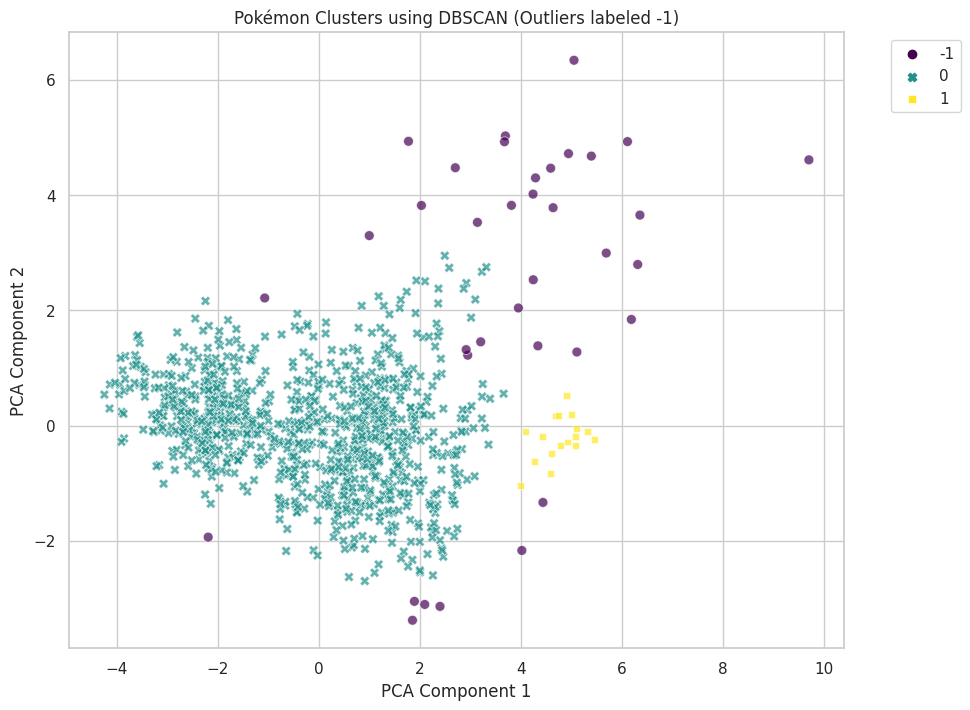

Number of Pokémon detected as outliers: 36
Outlier Pokémon:
              Name      PCA1      PCA2
25          Raichu  5.692972  2.992929
62            Abra -2.192429 -1.935334
94            Onix  0.998721  3.295895
110        Rhyhorn -1.072715  2.213801
129       Gyarados  3.205899  1.452842
149         Mewtwo  4.021318 -2.166624
207        Steelix  3.694930  5.025252
320        Wailord  4.640423  3.779869
375      Metagross  3.952959  2.040238
378      Registeel  2.949608  1.221245
382        Groudon  6.360151  3.651654
385         Deoxys  2.399609 -3.137476
482         Dialga  6.190481  1.841477
485      Regigigas  5.111240  1.276340
486       Giratina  6.316688  2.794929
712        Avalugg  2.702932  4.473200
749       Mudsdale  3.677185  4.924084
789        Cosmoem  1.775485  4.932050
794      Pheromosa  1.893138 -3.050063
796     Celesteela  6.113988  4.927065
798       Guzzlord  5.397856  4.675578
804      Stakataka  5.054196  6.338195
808       Melmetal  4.945104  4.718506
873 

In [5]:
# Find optimal eps value using Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort distances to find the "knee" point
distances = np.sort(distances[:, 4])

# Automatically select eps as the distance value at 95th percentile
eps_value = np.percentile(distances, 95)
print(f"Automatically selected eps value: {eps_value:.4f}")

# Apply DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels = dbscan.fit_predict(X_pca)

# Add cluster labels to DataFrame
pca_df['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    style='Cluster',
    s=50,
    alpha=0.7
)
plt.title('Pokémon Clusters using DBSCAN (Outliers labeled -1)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Identify outlier Pokémon
outliers = pca_df[pca_df['Cluster'] == -1]

print(f"Number of Pokémon detected as outliers: {outliers.shape[0]}")
print("Outlier Pokémon:")
print(outliers[['Name', 'PCA1', 'PCA2']])

# Why Auto-tuned DBSCAN Improved the Results

When we manually set `eps=0.8` and `min_samples=5`, the first clustering result had relatively few outliers detected, and clusters were not perfectly separated. The manually set `eps` might have been too large, causing nearby points to be grouped together even if they were not densely packed.

After applying automatic tuning, where `eps` is set based on the 95th percentile distance to the 5th nearest neighbor, the model adapts `eps` to the true data distribution:
- **Better separation** of clusters.
- **More realistic outlier detection** (outliers appear at the edges or isolated regions).
- **Fewer misclustered points**, improving the structure of detected groups.

Thus, auto-tuning `eps` creates more natural clusters and identifies Pokémon with extreme attributes more accurately.

# Why Certain Pokémon Are Treated as Outliers

DBSCAN identifies Pokémon as outliers when they have feature values (like HP, Attack, Defense, Speed, etc.) that are significantly different from the majority.

**Typically, outlier Pokémon fall into these categories:**
- **Extremely high or low Base Stats** compared to the bulk of Pokémon.
- **Very large or small physical size** (height, weight).
- **Unique stat distributions** (e.g., very high speed but very low defense).
- **Legendary, Mythical, and Ultra Beasts** often have exceptional stat patterns.

Since DBSCAN relies on "density" of points, Pokémon that are too far away from any dense cluster (high-dimensional space projected into PCA 2D space) are naturally classified as `-1` (outliers).

Thus, it is explainable: the statistical anomalies in their overall features cause them to be treated as outliers.


# Conclusion and Future Work

## 🎯 Key Takeaways
- **DBSCAN with PCA** helped us track down statistically "wild" Pokémon.
- **Auto-tuning eps** allowed the algorithm to adapt, making it easier to catch those elusive outliers.
- The detected outliers are not just random — they are legendary, mythical, massive, tiny, or just wildly powerful Pokémon!

## 🌟 Future Adventures
- **Type-based Explorations:**
  - Are Dragons really the strongest? Is Bug the weakest?
  - Handle **dual types** smartly — maybe split or encode both separately!

- **Legendary Teams:**
  - Group Pokémon like `Is_Legendary`, `Is_Mythical`, `Is_Ultra_Beast` — and don't forget our beloved **pseudo-legendaries** like Dragonite!

- **More Tools in the Pokébelt:**
  - Try **Isolation Forest** or **One-Class SVM** for sneakier outlier detection.
  - Use **t-SNE** for an even more magical 2D visualization.
  - **Cluster by Generation** — because Gen 1 and Gen 9 Pokémon are from totally different worlds!

- **Why Not Other Techniques?**
  - **KMeans** needs you to know the number of clusters — not ideal for hunting surprises!
  - **Hierarchical Clustering** could work but would slow us down without bringing much extra.

## 🚀 Extra Fun Ideas
- Predict if a Pokémon is Legendary from its stats.
- Create evolution tree graphs — like Pokédex family trees!
- Build a Dream Team recommender system — 6 Pokémon, minimal weaknesses, maximum awesomeness!

---

**Thank you for adventuring through the Pokémon data world! 🧢⚡ Let's catch 'em all — even the statistical oddballs!**
